<a href="https://colab.research.google.com/github/ajaythakur3369/Bharat-Intern-Internship/blob/main/Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Iris Flowers Classification**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Bharat Intern**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Bharat-Intern-Internship)**




## **Iris Flower Classification Using Decision Tree Algorithm:**

* The goal of the project is to classify different species of iris flowers based on their petal and sepal dimensions.
* The dataset contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The target variable is the species of iris flower, which can be setosa, versicolor, or virginica.
* The project involves building a machine learning model to classify new iris flower samples accurately, using various classification algorithms such as logistic regression, decision trees, k-nearest neighbors, support vector machines, or neural networks.
* Here, we are classifying using the Decision Tree Algorithm.
* The Iris Flowers dataset comprises 150 samples, with each sample containing four features and a target variable indicating the species of the flower. The variables in the dataset are as follows:
1. Sepal Length (in cm): Length of the sepal of the iris flower.
2. Sepal Width (in cm): Width of the sepal of the iris flower.
3. Petal Length (in cm): Length of the petal of the iris flower.
4. Petal Width (in cm): Width of the petal of the iris flower.
5. Species: Species of the iris flower, which can be setosa, versicolor, or virginica. The target variable, "Species," is a categorical variable represented as a string.









## **Importing the required libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew, norm

## **Reading Dataset:**

In [ ]:
# Accessing the drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/Bharat_Intern/File_Name/Iris_flowers_dataset.csv", encoding = 'ISO-8859-1')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## **Exploratory Data Analysis (EDA):**

### **Descriptive Statistics**

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Checking for missing/null and duplicate values:**

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

### **Dropping unwanted column ("Id"):**

In [ ]:
# The "Id" column does not contain any significant information
df.drop('Id', axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


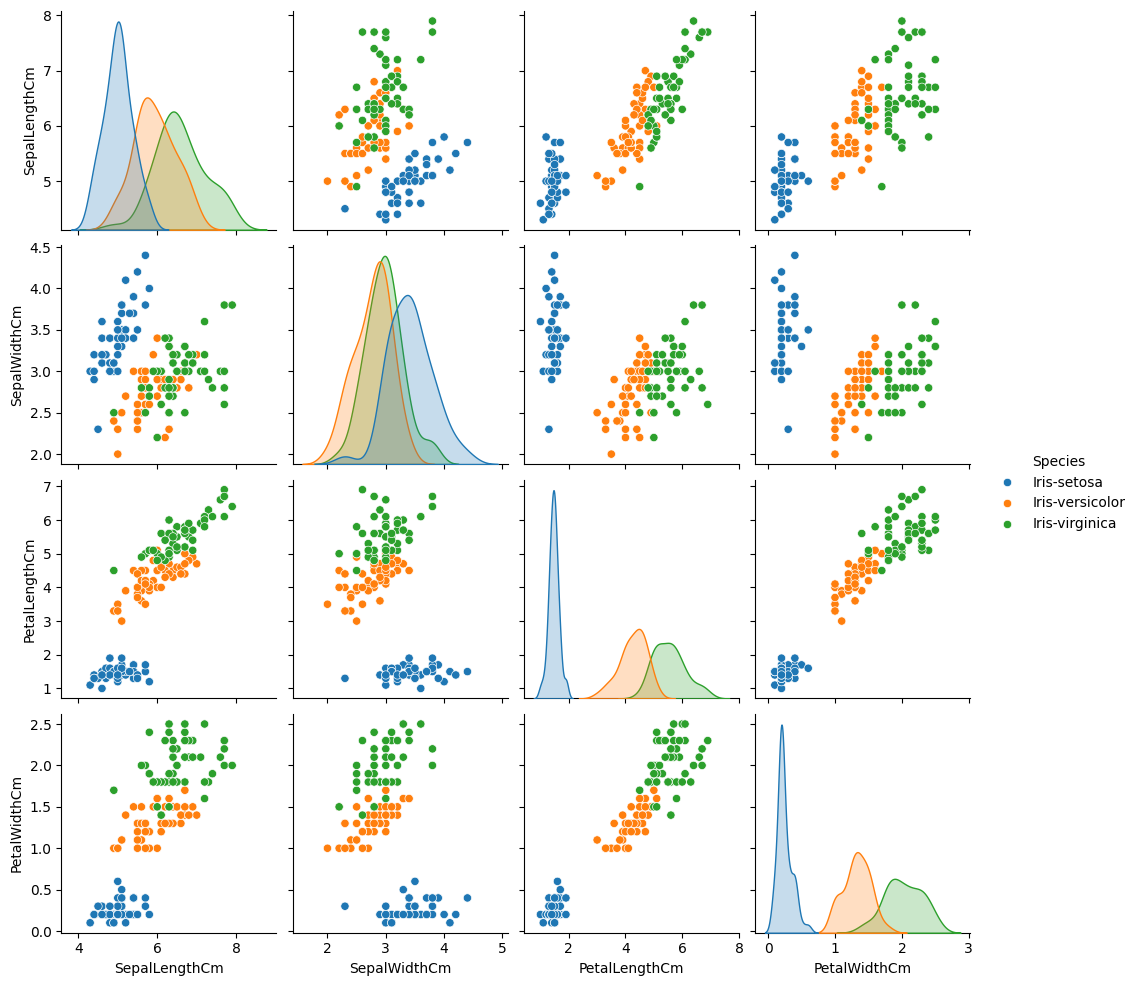

In [ ]:
sns.pairplot(df, hue = 'Species', diag_kind = "kde");

## **Distribution Plot of Features:**

In [ ]:
column = df.select_dtypes(['int64', 'float64']).columns

SepalLengthCm
0.3117530585022963


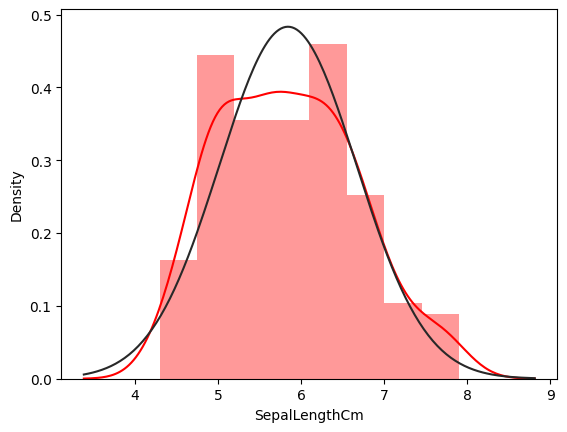

SepalWidthCm
0.330702812773315


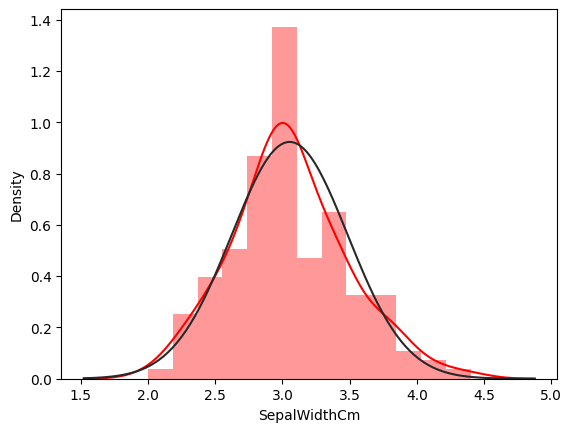

PetalLengthCm
-0.2717119501716388


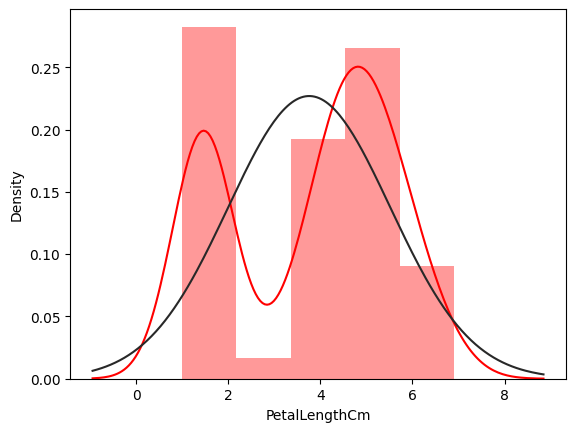

PetalWidthCm
-0.10394366626751729


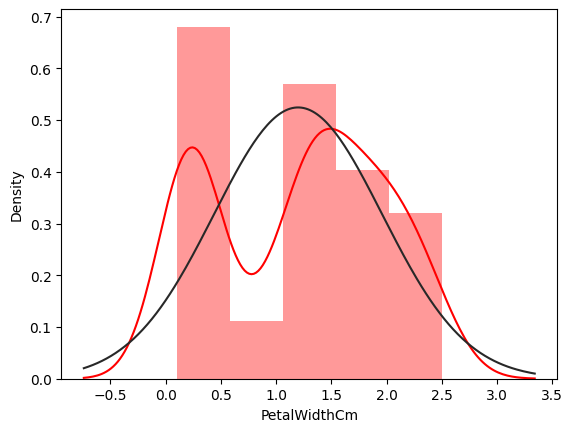

In [ ]:
for col in df[column]:
    print(col)
    print(skew(df[col]))
    sns.distplot(df[col], color = 'red', fit = norm)
    plt.show()

## **Box Plot of Features:**

SepalLengthCm
0.3117530585022963


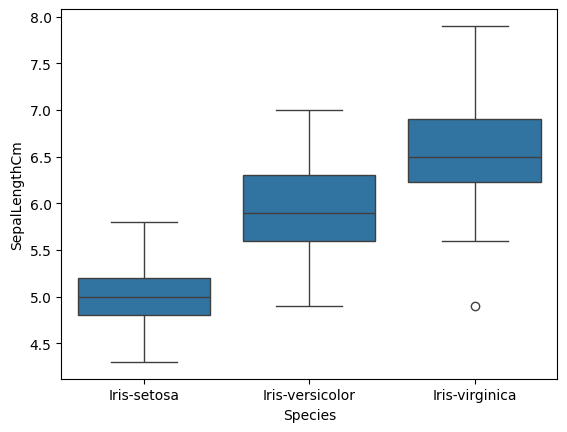

SepalWidthCm
0.330702812773315


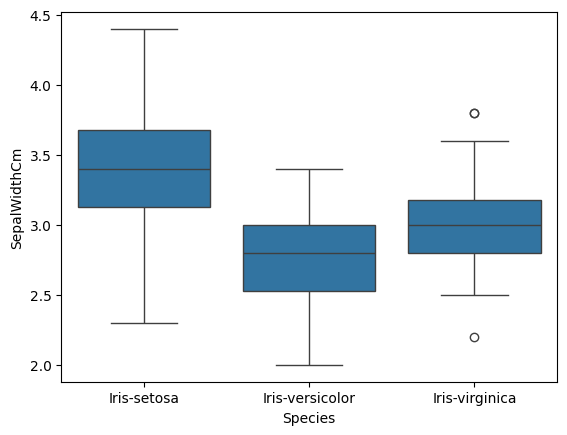

PetalLengthCm
-0.2717119501716388


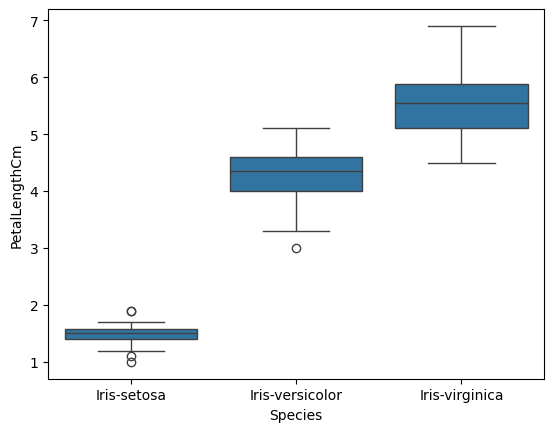

PetalWidthCm
-0.10394366626751729


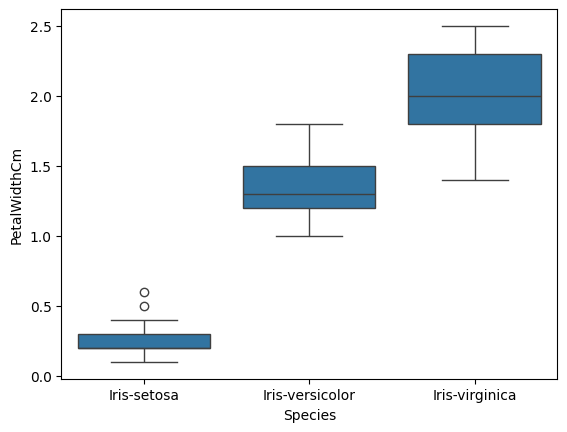

In [ ]:
for col in df[column]:
    print(col)
    print(skew(df[col]))
    sns.boxplot(data = df, x = 'Species', y = df[col])
    plt.show()

## **Petal Length vs. Petal Width:**

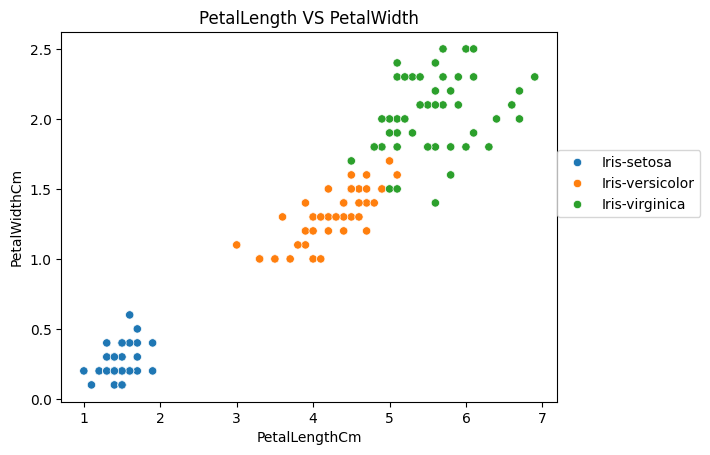

In [ ]:
sns.scatterplot(data = df, x = "PetalLengthCm", y = "PetalWidthCm", hue = 'Species')
plt.title("PetalLength VS PetalWidth")
plt.legend(loc = (1, 0.5))
plt.show()

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## **Sepal Length vs. Sepal Width:**

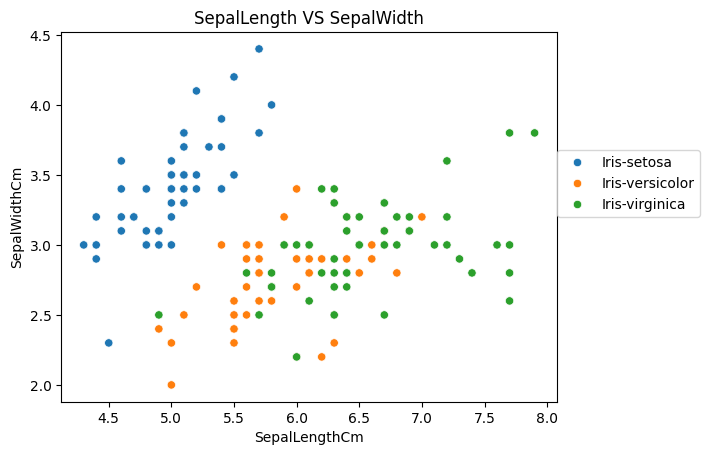

In [ ]:
sns.scatterplot(data = df, x = "SepalLengthCm", y = "SepalWidthCm", hue = 'Species')
plt.title("SepalLength VS SepalWidth")
plt.legend(loc = (1, 0.5))
plt.show()

## **Target Column: Species**

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## **Encoding:**

In [ ]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['Species'] = le.fit_transform(df['Species'])

In [ ]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

**Perfectly Balanced Target Columns**

## **Splitting Dataset:**

In [ ]:
x = df.drop('Species', axis = 1)
y = df['Species']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

## **Importing Decision Tree Classifier:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

## **Model Evaluation:**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')

Accuracy Score: 1.0


In [ ]:
print("Classification_Report\n", classification_report(ypred, ytest))

Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## **Checking for Overfitting and Underfitting:**

In [ ]:
train = dtc.score(xtrain, ytrain)
test = dtc.score(xtest, ytest)
print(f"Training Accuracy: {train}\nTesting Accuracy: {test}")

Training Accuracy: 1.0
Testing Accuracy: 1.0


**Perfect Model**

## **Scaling:**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
xs_train = scaler.fit_transform(xtrain)
xs_test = scaler.transform(xtest)

In [ ]:
dtcs = DecisionTreeClassifier()
dtcs.fit(xs_train, ytrain)
ypred = dtcs.predict(xs_test)
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
print("Classification_report\n", classification_report(ypred, ytest))

Accuracy Score: 1.0
Classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
train = dtcs.score(xs_train, ytrain)
test = dtcs.score(xs_test, ytest)
print(f"Training Accuracy: {train}\n Testing Accuracy: {test}")

Training Accuracy: 1.0
 Testing Accuracy: 1.0


## **Hyperparameter Tuning:**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtc = DecisionTreeClassifier()
param_grid = {
    "criterion":["gini", "entropy"],
    "max_depth":list(range(1, 20)),
    "min_samples_leaf":list(range(1, 20))
}
grid = GridSearchCV(estimator = dtc, param_grid = param_grid, verbose = 2)
grid.fit(xs_train, ytrain)
ypred = grid.predict(xs_test)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}

In [ ]:
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
train = grid.score(xs_train, ytrain)
test = grid.score(xs_test, ytest)
print(f'Training Accuracy: {train}\n Testing Accuracy: {test}')
print()
print("Classification_report\n",classification_report(ypred,ytest))

Accuracy Score: 1.0
Training Accuracy: 0.9714285714285714
 Testing Accuracy: 1.0

Classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## **Plotting Decision Tree:**

In [ ]:
from sklearn import tree

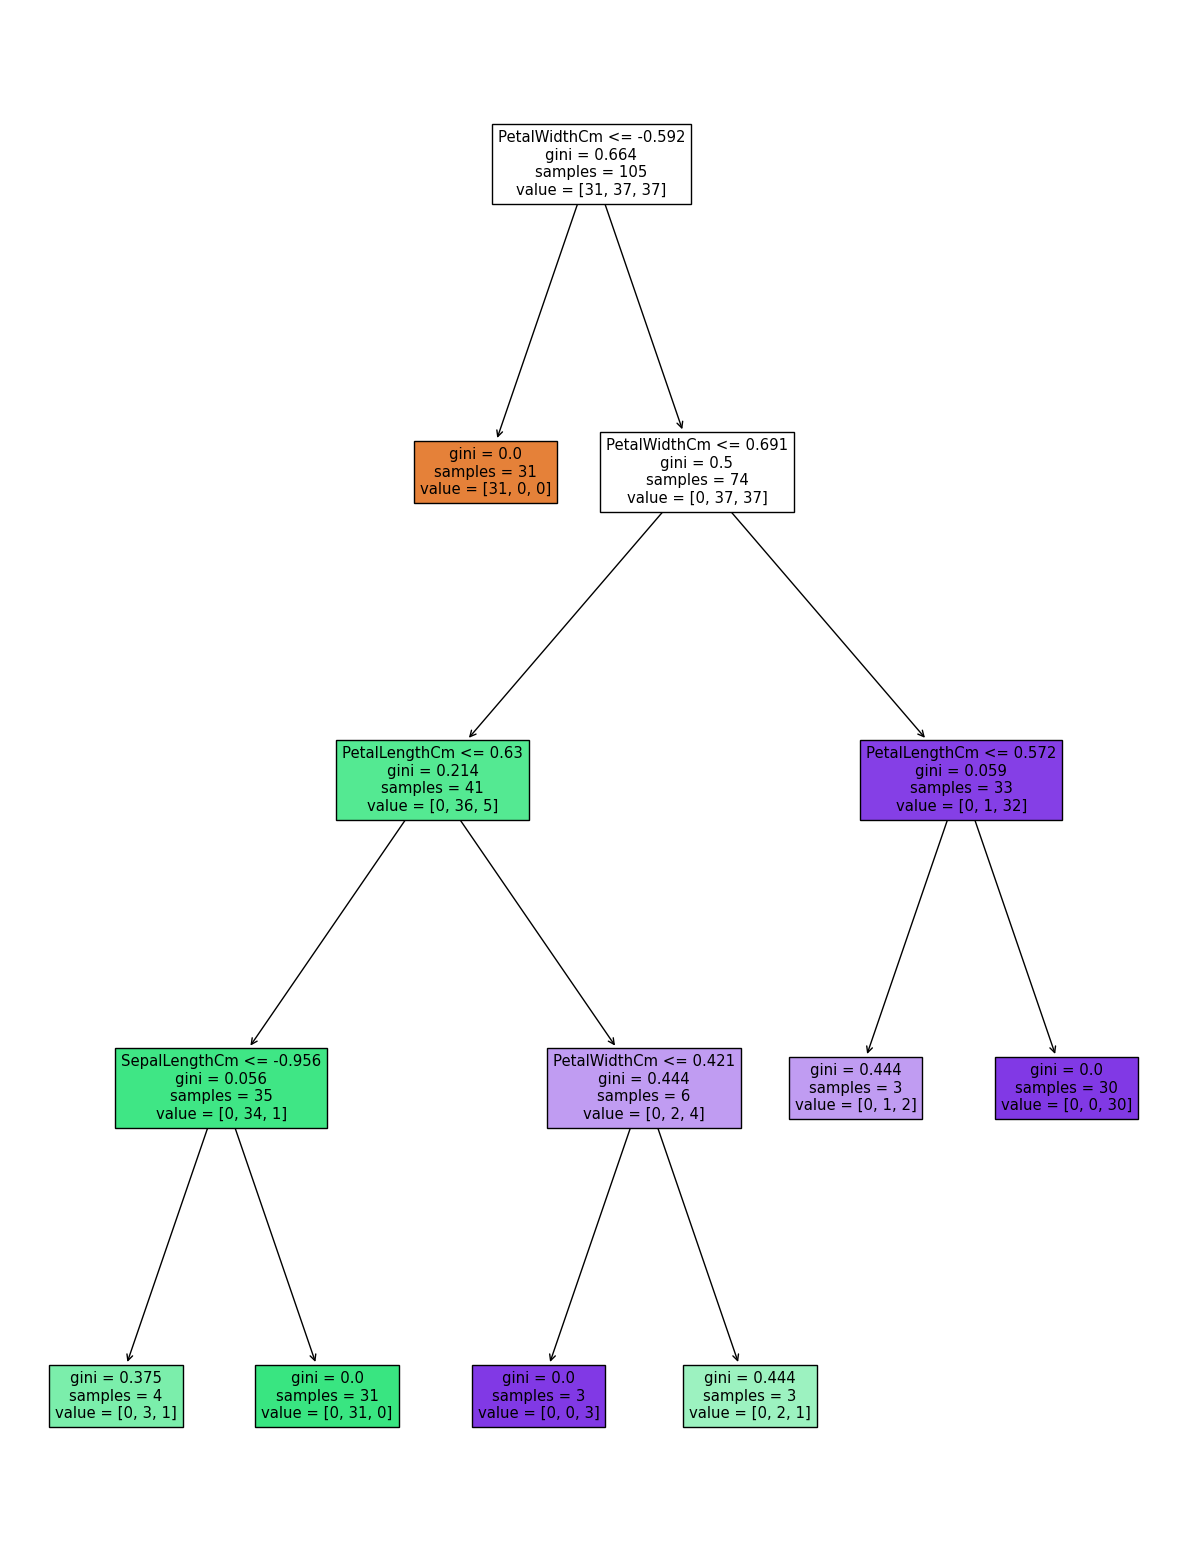

In [ ]:
fig,ax = plt.subplots(figsize = (15, 20))
tree.plot_tree(grid.best_estimator_, filled = True, feature_names = x.columns)
plt.show()

## **Bagging:**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bg = BaggingClassifier(dtc)
bg.fit(xtrain, ytrain)
ypred= bg.predict(xtest)

In [ ]:
train = bg.score(xtrain, ytrain)
test = bg.score(xtest, ytest)
print(f'Training Accuracy: {train}\n Testing Accuracy: {test}')
print(classification_report(ytest, ypred))

Training Accuracy: 1.0
 Testing Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## **Defining function for flower prediction:**

In [ ]:
# Final Model
Final_model = DecisionTreeClassifier()
Final_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
def predict_iris():
    sepl = float(input("Enter Sepal Length (cm) of Flower: "))
    sepw = float(input("Enter Sepal Width (cm) of Flower: "))
    petl = float(input("Enter Petal Length (cm) of Flower: "))
    petw = float(input("Enter Petal Width (cm) of Flower: "))
    newob = [[sepl, sepw, petl, petw]]
    yp = Final_model.predict(newob)
    print()
    if yp == 0:
        print('Iris-setosa Flower')
    elif yp == 1:
        print('Iris-versicolor Flower')
    else:
        print('Iris-virginica Flower')
    return yp

In [ ]:
predict_iris()

Enter Sepal Length (cm) of Flower: 1.2
Enter Sepal Width (cm) of Flower: 2.3
Enter Petal Length (cm) of Flower: 3.2
Enter Petal Width (cm) of Flower: 4.6

Iris-virginica Flower


array([2])

## **Conclusion:**

In this Python project on Iris flower classification, we successfully developed a machine learning model to classify different species of Iris flowers based on their sepal and petal measurements. We followed a systematic approach, including data exploration, preprocessing, model training, and evaluation.

Using Python's machine learning libraries, we explored the Iris dataset, visualized the data, and identified patterns between features and target classes. After preprocessing the data and splitting it into training and testing sets, we trained classification models such as logistic regression, decision trees, random forests, or support vector machines. We evaluated the models using accuracy, precision, recall, and F1-score.

Through model evaluation, we selected the most effective algorithm for Iris flower classification. The chosen model demonstrated high accuracy and precision in predicting the species based on measurements.

This project highlights the power of Python and its machine learning libraries in solving classification problems. The Iris flower classification project serves as a great introductory example for understanding machine learning fundamentals.

The insights gained from this project can be applied to various fields, including botany, agriculture, and ecological research. The ability to accurately classify Iris flower species based on physical attributes has practical implications.